In [1]:
# база
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Описание столбцов:
* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (ug/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

In [2]:
data = pd.read_csv('./Shanghai_HMT_2010.csv')
data.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0


In [4]:
# У посмотрим на уникальные значения cbwd и сколько раз они повторяются

data["cbwd"].value_counts()

NE    19497
SE    15073
NW     9569
SW     6108
cv     2325
Name: cbwd, dtype: int64

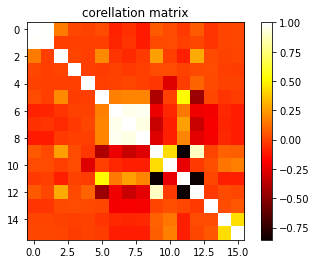

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             52584 non-null  int64  
 1   year           52584 non-null  int64  
 2   month          52584 non-null  int64  
 3   day            52584 non-null  int64  
 4   hour           52584 non-null  int64  
 5   season         52584 non-null  int64  
 6   PM_Jingan      24700 non-null  float64
 7   PM_US Post     34039 non-null  float64
 8   PM_Xuhui       25189 non-null  float64
 9   DEWP           52571 non-null  float64
 10  HUMI           52571 non-null  float64
 11  PRES           52556 non-null  float64
 12  TEMP           52571 non-null  float64
 13  cbwd           52572 non-null  object 
 14  Iws            52572 non-null  float64
 15  precipitation  48575 non-null  float64
 16  Iprec          48575 non-null  float64
dtypes: float64(10), int64(6), object(1)
memory usage: 

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
No,1.000000,9.860132e-01,1.662567e-01,1.550485e-02,4.560162e-04,3.482495e-02,-0.081625,-0.043969,-0.104622,0.071649,0.033044,-0.017652,0.066249,-0.029069,0.010374,0.017321
year,0.986013,1.000000e+00,1.753370e-04,-2.016196e-04,-1.718445e-15,-1.805473e-04,-0.074156,-0.030007,-0.105532,0.027505,0.033329,-0.003689,0.018172,-0.034414,0.010088,0.015920
month,0.166257,1.753370e-04,1.000000e+00,1.097865e-02,5.698666e-17,2.066777e-01,-0.034289,-0.058360,-0.015557,0.267539,-0.001398,-0.087295,0.291520,0.026506,0.002666,0.009725
day,0.015505,-2.016196e-04,1.097865e-02,1.000000e+00,-5.714985e-18,-1.271663e-02,0.000963,-0.019010,-0.003847,0.036410,0.036228,0.001801,0.024015,0.031892,-0.006100,-0.012925
hour,0.000456,-1.718445e-15,5.698666e-17,-5.714985e-18,1.000000e+00,-2.534235e-16,0.003807,0.017788,-0.002805,-0.026018,-0.263393,-0.008944,0.096579,0.027204,0.001017,0.006426
season,0.034825,-1.805473e-04,2.066777e-01,-1.271663e-02,-2.534235e-16,1.000000e+00,0.175668,0.194385,0.191640,-0.392531,-0.006191,0.519407,-0.442551,0.019659,-0.029424,-0.013536
PM_Jingan,-0.081625,-7.415595e-02,-3.428927e-02,9.627465e-04,3.806819e-03,1.756683e-01,1.000000,0.960529,0.966147,-0.228015,-0.069391,0.157716,-0.216905,-0.206994,-0.069849,-0.098605
PM_US Post,-0.043969,-3.000683e-02,-5.835999e-02,-1.900975e-02,1.778825e-02,1.943848e-01,0.960529,1.000000,0.948877,-0.331743,-0.088029,0.263330,-0.322774,-0.195162,-0.072639,-0.097102
PM_Xuhui,-0.104622,-1.055321e-01,-1.555729e-02,-3.846650e-03,-2.805011e-03,1.916401e-01,0.966147,0.948877,1.000000,-0.264248,-0.087162,0.189595,-0.248041,-0.199615,-0.070962,-0.099978
DEWP,0.071649,2.750479e-02,2.675393e-01,3.640950e-02,-2.601845e-02,-3.925309e-01,-0.228015,-0.331743,-0.264248,1.000000,0.431864,-0.854531,0.890418,0.008583,0.089399,0.083566


In [6]:
# Посмотрим на матрицу кореляций

A = data.corr().to_numpy()
import matplotlib.pyplot as plt

plt.title('corellation matrix')
plt.imshow(A, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

# посмотрим на число нан-ов
data.info()

# почитаем на матрицу кореляций
data.corr()

## Наблюдение 1 : 
PM_Jingan , PM_US post, PM_Xuihui - неплохо между собой кореллируют (можно заменить одним признаком). А еще в PM_US_POST 34039 не NaN-ов, что все еще большое число, поэтому мы посnупим следующим образом: отбросим все строки где все три признака - NaN, а во всех остальных заменим три признака одним (любым)
## Наблюдение 2 :
В precipitation и iprec тоже надо избавиться от NaN-ов
## Наблюдение 3 
Нет нужды держать столько признаков по времени, оставим только год и месяц (сезон не нужен), которые будем трактовать как категориальные (ну вдруг там по сентябрям стабильно осадки больше). А еще заведем новый порядковый признак времени в часах, отсчитанного от некоторой стартовой точки

In [17]:
# Приведем табличку к человеческому виду

date = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# заменяем PM на один
PM = data['PM_Jingan'].notna() * data['PM_Jingan']
PM[~PM.notna()] = data['PM_US Post'][~PM.notna()].notna() * data['PM_US Post'][~PM.notna()]
PM[~PM.notna()] = data['PM_Xuhui'][~PM.notna()].notna() * data['PM_Xuhui'][~PM.notna()]

work_data = data[['year', 'month', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec']]
work_data = work_data.join(pd.DataFrame({'date' : date} ) )
work_data = work_data.join(pd.DataFrame({'PM' : PM} ) )

work_data = work_data.dropna()
work_data.head()

work_data_tmp = work_data

# Часть 1. Предсказание давления

Здесь направление ветра рассмтаривается как признак

In [18]:
# делаем для категориальных признаков one-hot encoding

dummy1 = pd.get_dummies(work_data['year'], drop_first=True)
work_data = pd.concat([work_data, dummy1], axis=1).drop('year', axis=1)

dummy2 = pd.get_dummies(work_data['month'], drop_first=True)
work_data = pd.concat([work_data, dummy2], axis=1).drop('month', axis=1)

dummy3 = pd.get_dummies(work_data['cbwd'], drop_first=True)
work_data = pd.concat([work_data, dummy3], axis=1).drop('cbwd', axis=1)

In [19]:
# Вот она, лица моей мечты !

work_data.head()

,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,date,PM,2012,...,7,8,9,10,11,12,NW,SE,SW,cv
17442,4.0,62.00,1027.1,11.0,8.0,0.0,0.0,2011-12-28 18:00:00,36.0,0,...,0,0,0,0,0,1,0,0,0,0
17443,4.0,62.00,1027.1,11.0,9.0,0.0,0.0,2011-12-28 19:00:00,41.0,0,...,0,0,0,0,0,1,0,0,0,0
17444,5.0,71.07,1028.1,10.0,11.0,0.0,0.0,2011-12-28 20:00:00,44.0,0,...,0,0,0,0,0,1,0,0,0,0
17445,5.0,71.07,1028.1,10.0,13.0,0.0,0.0,2011-12-28 21:00:00,40.0,0,...,0,0,0,0,0,1,0,0,0,0
17446,6.0,76.18,1028.1,10.0,15.0,0.0,0.0,2011-12-28 22:00:00,25.0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
work_data['date'] = work_data['date'].astype('int'); # ну просто чтобы numpy не ругался
work_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,date,PM,2012,...,7,8,9,10,11,12,NW,SE,SW,cv
17442,4.0,62.00,1027.1,11.0,8.0,0.0,0.0,1325095200000000000,36.0,0,...,0,0,0,0,0,1,0,0,0,0
17443,4.0,62.00,1027.1,11.0,9.0,0.0,0.0,1325098800000000000,41.0,0,...,0,0,0,0,0,1,0,0,0,0
17444,5.0,71.07,1028.1,10.0,11.0,0.0,0.0,1325102400000000000,44.0,0,...,0,0,0,0,0,1,0,0,0,0
17445,5.0,71.07,1028.1,10.0,13.0,0.0,0.0,1325106000000000000,40.0,0,...,0,0,0,0,0,1,0,0,0,0
17446,6.0,76.18,1028.1,10.0,15.0,0.0,0.0,1325109600000000000,25.0,0,...,0,0,0,0,0,1,0,0,0,0


А вот теперь уже займемся обучением

In [23]:
from sklearn.model_selection import train_test_split

target = 'PRES';
cols = work_data.columns

X_train, X_test, y_train, y_test = train_test_split(work_data[cols[cols!=target]], work_data[target], test_size=0.3)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, explained_variance_score

# нормирвока данных
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)

In [25]:
# важно не забыть отнормировать и тестовую выборку
X_test = sc.transform(X_test);

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'alpha' : np.linspace(0, 1, 8),
    'l1_ratio' : np.linspace(0.1, 1, 8)
}
model = ElasticNet()

slv = GridSearchCV(model, params)
slv.fit(X_train, y_train)

In [30]:
slv.best_params_

{'alpha': 0.0, 'l1_ratio': 0.1}

Немного странно видеть что регуляризация делает решение только хуже, но видимо это из-за того что был проведен основатлеьный препроцессинг данных

In [32]:
# посчитаем score
slv.score(X_test, y_test)

0.86169865001877

In [35]:
# а с ошибкой ка ктам дела?
predictions = slv.predict(X_test)
mean_squared_error(predictions, y_test)

11.046757728831023

# Часть 2 : предсказание направдения ветра

Здесь давление рассмтаривается как признак

In [36]:
work_data = pd.concat([work_data, work_data_tmp['cbwd']], axis=1).drop(['NW', 'SE', 'SW', 'cv'], axis=1)

In [37]:
work_data.columns

Index([         'DEWP',          'HUMI',          'PRES',          'TEMP',
                 'Iws', 'precipitation',         'Iprec',          'date',
                  'PM',            2012,            2013,            2014,
                  2015,               2,               3,               4,
                     5,               6,               7,               8,
                     9,              10,              11,              12,
                'cbwd'],
      dtype='object')

In [48]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32506 entries, 17442 to 52583
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DEWP           32506 non-null  float64
 1   HUMI           32506 non-null  float64
 2   PRES           32506 non-null  float64
 3   TEMP           32506 non-null  float64
 4   Iws            32506 non-null  float64
 5   precipitation  32506 non-null  float64
 6   Iprec          32506 non-null  float64
 7   date           32506 non-null  int64  
 8   PM             32506 non-null  float64
 9   2012           32506 non-null  uint8  
 10  2013           32506 non-null  uint8  
 11  2014           32506 non-null  uint8  
 12  2015           32506 non-null  uint8  
 13  2              32506 non-null  uint8  
 14  3              32506 non-null  uint8  
 15  4              32506 non-null  uint8  
 16  5              32506 non-null  uint8  
 17  6              32506 non-null  uint8  
 18  7 

In [143]:
from sklearn.model_selection import train_test_split

target = 'cbwd';
cols = work_data.columns

X_train, X_test, y_train, y_test = train_test_split(work_data[cols[cols!=target]], work_data[target], test_size=0.2)

print(y_train.value_counts())
print(y_test.value_counts())

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

NE    9987
SE    7299
NW    4868
SW    2955
cv     895
Name: cbwd, dtype: int64
NE    2541
SE    1875
NW    1204
SW     653
cv     229
Name: cbwd, dtype: int64


In [144]:
# тоже нужна нормировка
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test);

In [145]:
from sklearn.linear_model import LogisticRegression

# GridSeacrh кстати пробовал, но он долгий и нормальный результат не дал
# Поэтому параметры подбирал руками преимущественно

clf = LogisticRegression(penalty='elasticnet', C = 0.5, l1_ratio = 0.9, solver='saga', max_iter = 5000);
#clf = LogisticRegression(penalty='l1', C = 1.0, solver = 'liblinear', max_iter = 1500)

clf.fit(X_train, y_train);

In [146]:
# ух, ну и какого результат добились?
clf.score(X_test, y_test)

0.5121501076591818

In [147]:
# посмотрим на метрики качества для задачи бинарнйо классификации каждого класса
predictions = clf.predict(X_test)
labels = work_data['cbwd'].unique()

N = labels.size
TP = np.zeros(N);
FP = np.zeros(N);
TN = np.zeros(N);
FN = np.zeros(N);



for i in range(0, predictions.size):
  for j in range(N):
    label = labels[j]
    TP[j] += (predictions[i] == label) & (y_train[i] == label)
    TN[j] += (predictions[i] != label) & (y_train[i] != label)
    FN[j] += (predictions[i] != label) & (y_train[i] == label)
    FP[j] += (predictions[i] == label) & (y_train[i] != label)

In [148]:
accuracy = (TP + TN) / predictions.size
precision = (TP ) / (TP+FP)
recall = TP / (TP+FN)

for i in range(N):
  print('label', labels[i], '[accuracy, precision, recall] : {:.3}, {:.3}, {:.3}'.format(accuracy[i], precision[i], recall[i]))

label NE [accuracy, precision, recall] : 0.502, 0.381, 0.491
label NW [accuracy, precision, recall] : 0.733, 0.194, 0.148
label cv [accuracy, precision, recall] : 0.942, 0.034, 0.0207
label SE [accuracy, precision, recall] : 0.594, 0.293, 0.295
label SW [accuracy, precision, recall] : 0.84, 0.0976, 0.0502


Получилось как-то плохо, особенно низкий precision у cv - но тут причина в том что это редкий лейбл

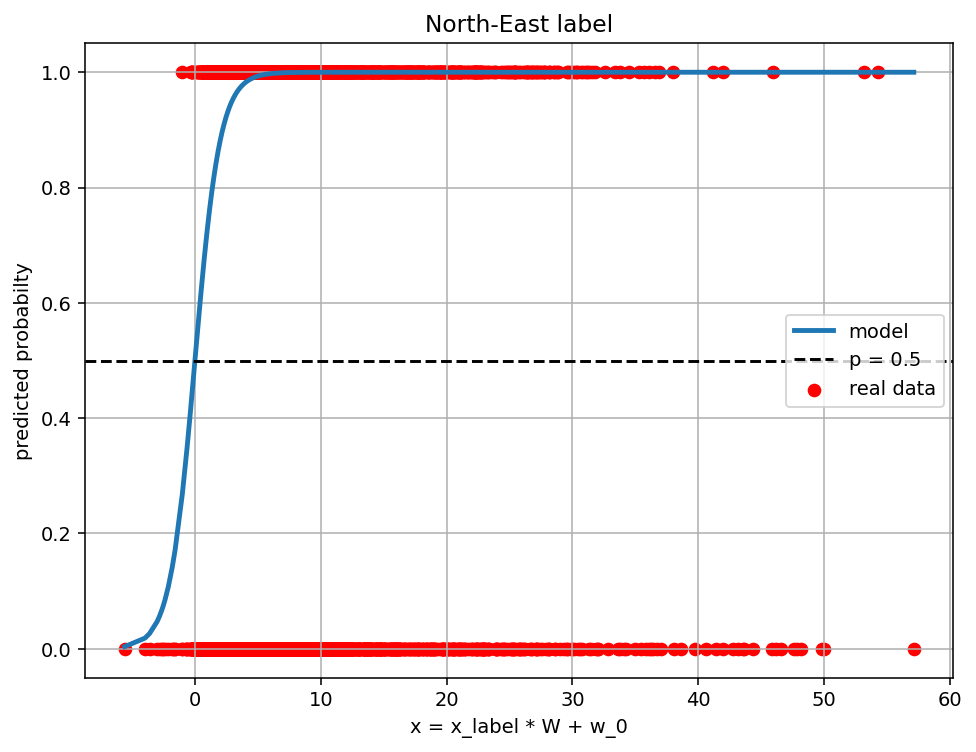

In [152]:
# логистчиеская кривая для NE

W = clf.coef_[0, :]
w_0 = clf.intercept_[0]

x = X_test @ W + w_0

ind = np.argsort(x)

x_sorted = x[ind]
p = 1 / (1+np.exp(-x_sorted ))

filt = y_test == 'NE'
y_real = y_test == 'NE'
x_filt = x

plt.figure(figsize=(8, 6), dpi=140)

plt.title('North-East label')
plt.grid()
plt.plot(x_sorted, p, LineWidth = 2.5, label='model')
plt.scatter(x_filt, y_real, color='r', label='real data')

plt.axhline(0.5, LineStyle = '--', color='k', label='p = 0.5')

plt.ylabel('predicted probabilty')
plt.xlabel(r'x = x_label * W + w_0')

plt.legend()
plt.show()

# Вывод

Даже по тому как соотносится y_test с предсказанием модели, можно сделать вывод что логистическая регрессия в этой задаче не очень хорошо подходит.